In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
df = pd.read_csv("SBAnational.csv", low_memory=False)

In [316]:
df.shape

(899164, 27)

In [317]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [319]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [320]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [321]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'Zip', 'FranchiseCode'], inplace=True)

In [322]:
date_cols = ['DisbursementDate', 'ApprovalDate', 'ChgOffDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')

In [323]:
df['loan_processing_days'] = (df['DisbursementDate'] - df['ApprovalDate']).dt.days
df['loan_age'] = (df['ChgOffDate'] - df['DisbursementDate']).dt.days

In [324]:
df['MIS_Status'] = df['MIS_Status'].str.upper().map({'P I F': 'Good Loan', 'CHGOFF': 'Bad Loan'})
df['default_flag'] = np.where(df['MIS_Status'] == 'Bad Loan', 1, 0)

In [325]:
df['UrbanRural'] = df['UrbanRural'].map({0: 'Unknown', 1: 'Urban', 2: 'Rural'})

In [326]:
df['LowDoc'] = df['LowDoc'].map({'Y': 1, 'N': 0})

In [327]:
df['RevLineCr'] = df['RevLineCr'].replace({'Y': 1, 'N': 0}).fillna(0)

In [328]:
df['NewExist'] = df['NewExist'].map({1: 'New', 2: 'Existing'})

In [329]:
numeric_cols = ['Term', 'CreateJob', 'RetainedJob']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [330]:
money_cols = ['DisbursementGross', 'BalanceGross', 'SBA_Appv', 'GrAppv']
for col in money_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [331]:
df['loan_to_SBA_ratio'] = np.where(df['SBA_Appv'] > 0, df['DisbursementGross'] / df['SBA_Appv'], 0)
df['jobs_per_million'] = np.where(df['DisbursementGross'] > 0,(df['CreateJob'] + df['RetainedJob']) / (df['DisbursementGross'] / 1_000_000), 0)

In [332]:
df = df[df['DisbursementDate'] >= df['ApprovalDate']]

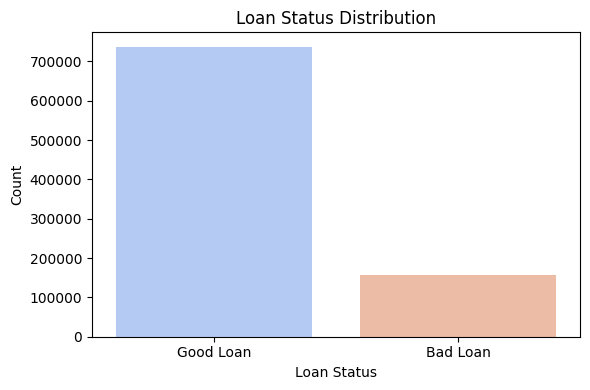

In [333]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='MIS_Status', palette='coolwarm', hue='MIS_Status', legend=False)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

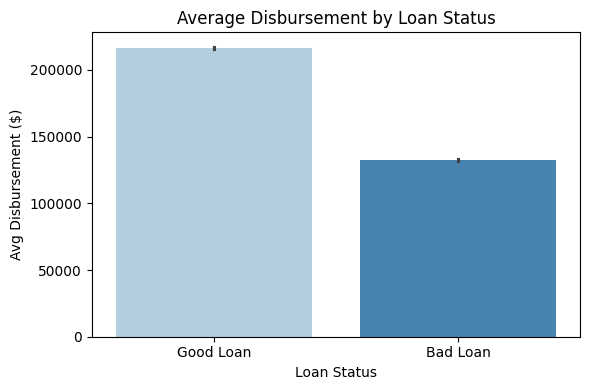

In [334]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='MIS_Status', y='DisbursementGross', estimator=np.mean, hue='MIS_Status', palette='Blues', legend=False)
plt.title("Average Disbursement by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Avg Disbursement ($)")
plt.tight_layout()
plt.show()

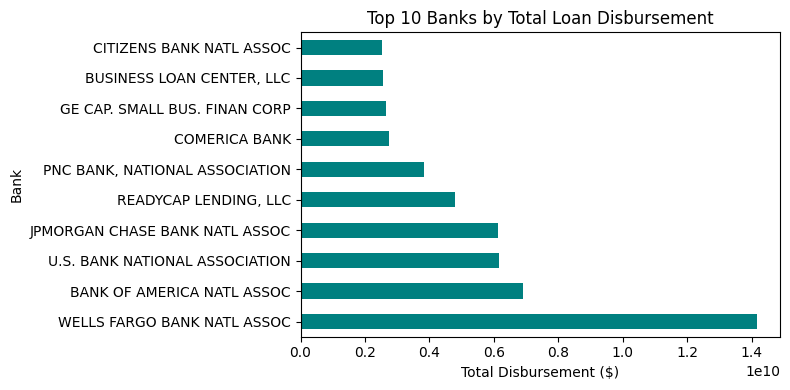

In [335]:
top_banks = df.groupby('Bank')['DisbursementGross'].sum().nlargest(10)
top_banks.plot(kind='barh', color='teal', figsize=(8,4))
plt.title("Top 10 Banks by Total Loan Disbursement")
plt.xlabel("Total Disbursement ($)")
plt.tight_layout()
plt.show()

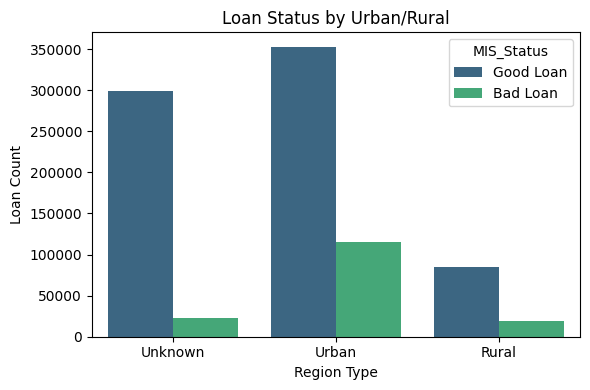

In [336]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='UrbanRural', hue='MIS_Status', palette='viridis')
plt.title("Loan Status by Urban/Rural")
plt.xlabel("Region Type")
plt.ylabel("Loan Count")
plt.tight_layout()
plt.show()

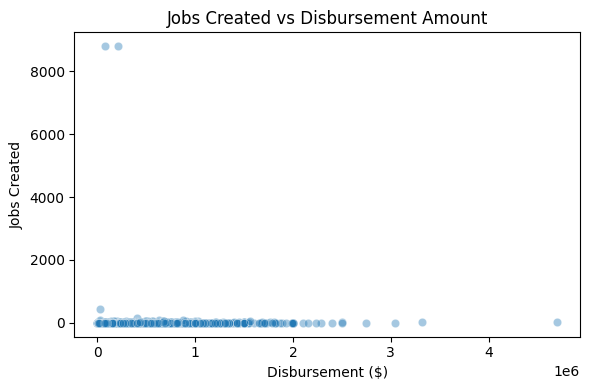

In [337]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df.sample(5000), x='DisbursementGross', y='CreateJob', alpha=0.4)
plt.title("Jobs Created vs Disbursement Amount")
plt.xlabel("Disbursement ($)")
plt.ylabel("Jobs Created")
plt.tight_layout()
plt.show()

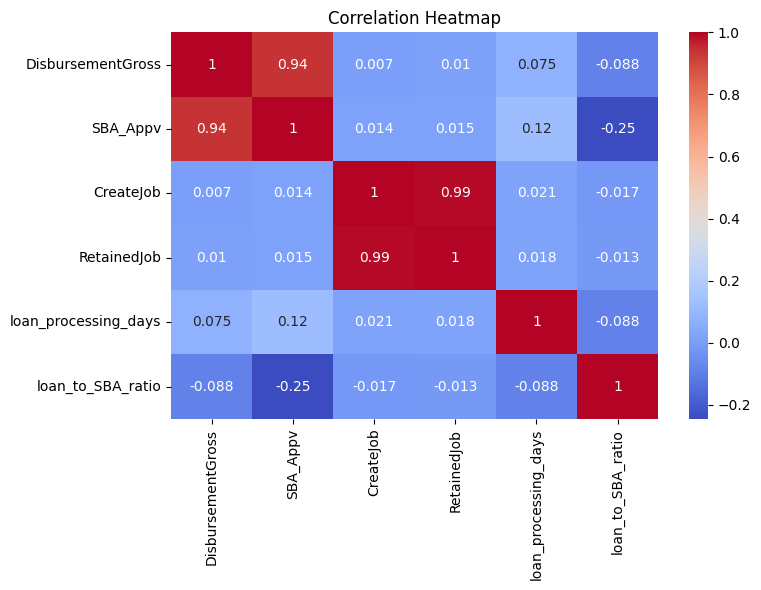

In [338]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['DisbursementGross','SBA_Appv','CreateJob','RetainedJob','loan_processing_days','loan_to_SBA_ratio']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [339]:
print("\nSummary of Key Insights:")
print(f"Total Loans: {len(df)}")
print(f"Good Loans: {sum(df['MIS_Status']=='Good Loan')}")
print(f"Bad Loans: {sum(df['MIS_Status']=='Bad Loan')}")
print(f"Average Disbursement: ${df['DisbursementGross'].mean():,.2f}")
print(f"Average Jobs Created per $1M: {df['jobs_per_million'].mean():.2f}")


Summary of Key Insights:
Total Loans: 895988
Good Loans: 737021
Bad Loans: 157164
Average Disbursement: $201,405.89
Average Jobs Created per $1M: 286.82
